In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import torch as th

In [2]:
from lib.functional.generate_heatmaps import GenerateHeatmaps

In [3]:
device = 'cpu'
# device = 'cuda:0'

device = th.device(device)
th.manual_seed(2)
batch_size = 1
num_joints = 1

image_size = 256
heatmap_size = 64
sigma = 5

joints = th.tensor([[[180, 85]]], dtype=th.float32)

joints = joints.to(device)
joints_mask = th.ones(batch_size, num_joints, dtype=th.bool) # visibility mask

batch_idx = 0
#joints_mask[batch_idx,[0,0]] = False # let's make some joints non-visible on the image

joints.requires_grad = True

print(joints.shape, joints_mask.shape)
print(joints[batch_idx])
print(joints_mask[batch_idx])

torch.Size([1, 1, 2]) torch.Size([1, 1])
tensor([[180.,  85.]], grad_fn=<SelectBackward>)
tensor([True])


In [4]:
gen_hmaps = GenerateHeatmaps(image_size=(image_size, image_size),
                             heatmap_size=(heatmap_size, heatmap_size), sigma=sigma)

In [5]:
heatmaps = gen_hmaps(joints, joints_mask)

In [6]:
joints_, heatmaps_ = joints[0].detach().cpu(), heatmaps[0].detach().cpu()

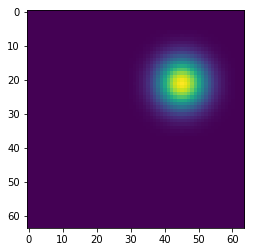

In [7]:
plt.imshow(heatmaps_[0])

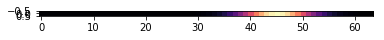

In [33]:
plt.imshow(heatmaps_.sum(dim=1), cmap='magma')

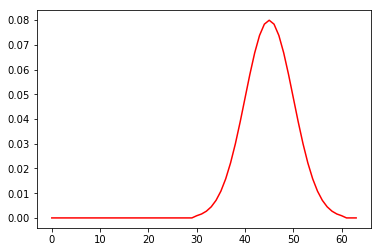

In [37]:
plt.plot(heatmaps_.sum(dim=1)[0], color='red')

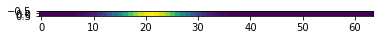

In [9]:
plt.imshow(heatmaps_.sum(dim=2))

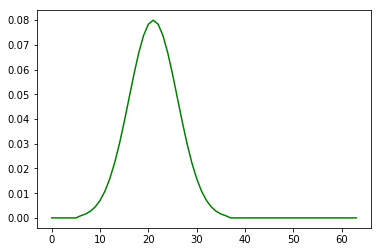

In [39]:
plt.plot(heatmaps_.sum(dim=2)[0], color='green')

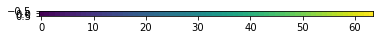

In [44]:
plt.imshow(th.arange(heatmap_size).unsqueeze(0))

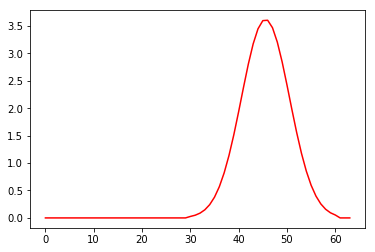

In [58]:
plt.plot((heatmaps_.sum(dim=1) * th.arange(heatmap_size))[0], color='red')

In [11]:
#heatmaps_ = th.nn.functional.softmax(heatmaps_, 2)

In [45]:
print((heatmaps_.sum(dim=1) * th.arange(heatmap_size)).sum(dim=1)/ 64 * 256)

tensor([180.0000])


In [19]:
th.arange(heatmap_size)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63])